#data make

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def make_data(dimention=2):
    #正常データの作成（2次元）
    x1 = np.random.normal(1, 0.3, (1, 100))
    y1 = np.random.normal(1, 0.3, (1, 100))
    x2 = np.random.normal(1.5, 0.3, (1, 100))
    y2 = np.random.normal(1.5, 0.3, (1, 100))

    #テストデータの作成（2次元）
    test2 = np.array([0.5,2])
    test2 = test2.reshape((1,2))

    #データの形を整える
    data = []
    data.append(x1)
    data.append(x2)
    data.append(y1)
    data.append(y2)
    data = np.array(data)
    data = data.reshape(2,200)
    data = data.transpose()

    #X次元に拡張
    data_new = np.random.normal(0, 0.1, (200, dimention))
    anomaly_new = np.random.normal(0, 0.1,(1,dimention))
    
    data = np.hstack((data,data_new))
    test2 = np.hstack((test2, anomaly_new))
    print(data.shape)

    #可視化
    plt.figure(figsize=(5,5))

    plt.scatter(data[:,0], data[:,1], c="green", s=50)
    plt.scatter(test2[:,0],test2[:,1],c="red", s=50, label="Test_anomaly")
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.legend()

    plt.show()

    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.scatter(data[:,0], data[:,2], c="green", s=50)
    plt.scatter(test2[:,0],test2[:,2],c="red", s=50, label="Test_anomaly")
    plt.xlabel("x_1")
    plt.ylabel("x_3")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(data[:,0], data[:,3], c="green", s=50)
    plt.scatter(test2[:,0],test2[:,3],c="red", s=50, label="Test_anomaly")
    plt.xlabel("x_1")
    plt.ylabel("x_4")
    plt.legend()

    plt.show()

    return data, test2

(200, 4)


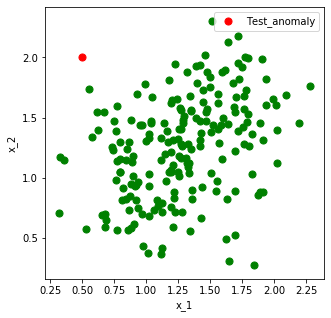

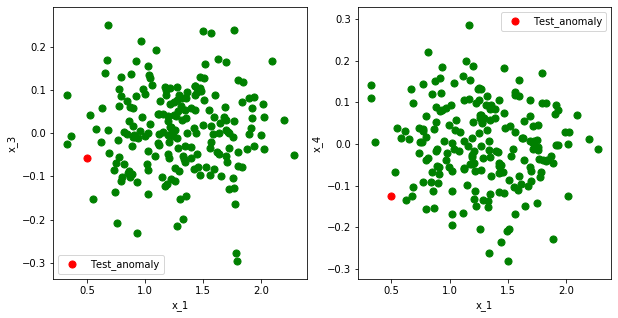

In [0]:
x_train, x_anomaly = make_data()

#Isolation Forest

In [0]:
from sklearn.ensemble import IsolationForest

def IF_make(x):
    # training
    IF = IsolationForest(n_estimators=100, max_samples=50)
    IF.fit(x)
    return IF

In [0]:
model = IF_make(x_train)

#permutation importance

In [0]:
def permutation_importance(train, test, model, repeats=100):
    criterion = -model.decision_function(test)[0]# スコアが大きいほど異常度が高いように符号反転
    result = np.zeros((repeats, test.shape[1]))

    for feature in range(test.shape[1]):
        for n in range(repeats):
            result[n, feature] = -model.decision_function(permuted(train, test, feature))

    result -= criterion
    result = -np.sum(result, axis=0)# 値が大きいほど、異常度
    return result

def permuted(train, test, column):
    result = np.copy(test)
    result[0, column] = np.random.permutation(train[column])[0]
    return result

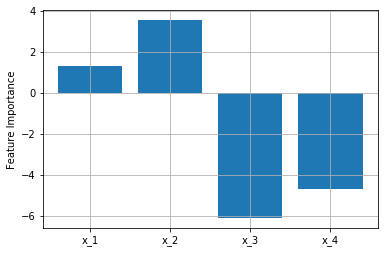

In [0]:
result = permutation_importance(x_train, x_anomaly, model)
label = ["x_1","x_2","x_3","x_4"]

plt.figure()
plt.bar(label, result, align="center")
plt.grid(True)
plt.ylabel("Feature Importance")
plt.grid(True)
plt.show()

# extra sensor = 8

(200, 10)


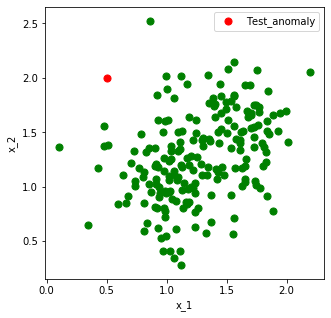

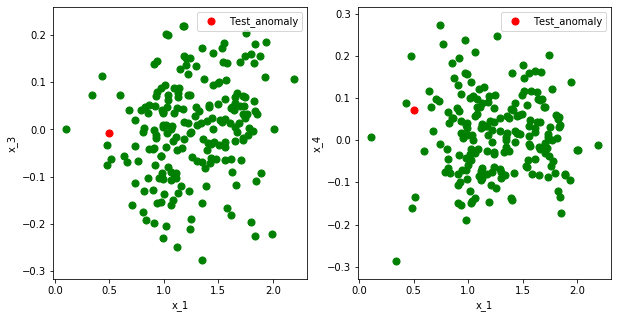

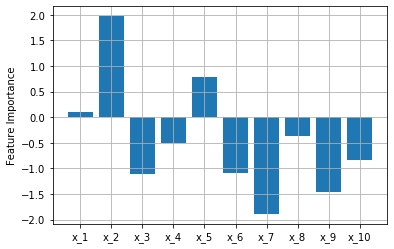

In [0]:
x_train, x_anomaly = make_data(8)
model = IF_make(x_train)
result = permutation_importance(x_train, x_anomaly, model)

label = ["x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8","x_9","x_10"]

plt.figure()
plt.bar(label, result, align="center")
plt.grid(True)
plt.ylabel("Feature Importance")
plt.grid(True)
plt.show()

(200, 10)


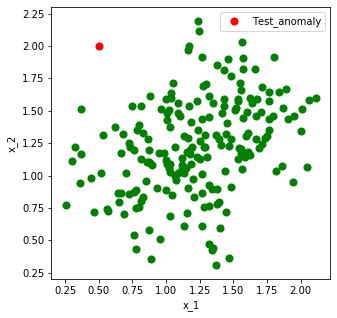

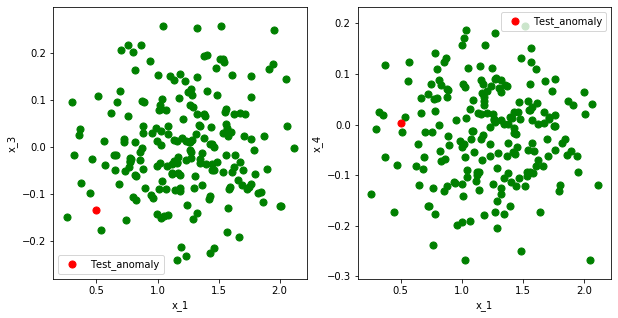

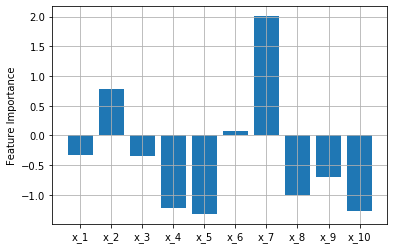

In [0]:
x_train, x_anomaly = make_data(8)
model = IF_make(x_train)
result = permutation_importance(x_train, x_anomaly, model)

label = ["x_1","x_2","x_3","x_4","x_5","x_6","x_7","x_8","x_9","x_10"]

plt.figure()
plt.bar(label, result, align="center")
plt.grid(True)
plt.ylabel("Feature Importance")
plt.grid(True)
plt.show()